<a href="https://colab.research.google.com/github/Jast15/data-analysis/blob/main/%D0%98%D1%82%D0%BE%D0%B3%D0%BE%D0%B2%D1%8B%D0%B9_%D0%BF%D1%80%D0%BE%D0%B5%D0%BA%D1%82.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Описание проекта

Вам предоставлена выгрузка заказов из CRM компании, занимающейся В2В-продажами.  На основе
этих данных вам нужно подготовить дашборд для директора компании, который даст общее
понимание ситуации с продажами, наглядно покажет ответы на вопросы:

1. Как менеджеры выполняют план продаж?
2. Какова помесячная динамика выполнения плана, есть ли сезонные «просадки»?
3. Какова география продаж, какие регионы самые доходные?
4. Как влияет канал продаж на выполнение плана, конверсию, длительность сделки?
5. Какие товарные категории пользуются спросом (по числу клиентов) и по продажам?

Дашборд должен дать информацию для принятия решений:
Профилировать ли менеджеров по товарным категориям или каналам продаж (где они лучше закрывают сделки, выполняют план)
Расширять самые доходные каналы продаж, регионы, где есть высокий спрос


Задание

Откройте файл с данными и изучите общую информацию
Подготовьте данные
Проведите исследовательский анализ данных
Составьте портрет менеджера каждого региона
Проведите исследование статистических показателей
Проверьте гипотезы
Напишите общий вывод


# Загрузка данных, изучение общей информации

In [ ]:
import pandas as pd

# Загрузка данных из CSV файла
data = pd.read_excel('data.xlsx')

print(data.head())  # первые 5 строк

print(data.isnull().sum())

print(data.info())


   Номер заказа     Канал продаж     Продуктовый сегмент  Менеджер  \
0          7290     Рекомендация      Ткань и аксессуары  С. Милер   
1          7291     Рекомендация      Ткань и аксессуары  С. Милер   
2          7436     Рекомендация      Ткань и аксессуары  С. Милер   
3          7484     Рекомендация      Ткань и аксессуары  С. Милер   
4          7040  Холодный звонок  Электронные устройства  М. Баили   

          Название заказа  Продавец            Город  Продажи факт, тыс.руб  \
0                NAM SUNG  Айсберг   Санкт-Петербург                    300   
1                CP Ткань  Айсберг   Санкт-Петербург                    450   
2          UNIZIN COMPANY  Айсберг   Санкт-Петербург                      0   
3                NAM SUNG  Айсберг   Санкт-Петербург                    500   
4  Электронные устройства  Alen.com     Магнитогорск                    100   

   Продажи план, тыс.руб Дата сделки Дата оплаты Дней между сделкой и оплатой  \
0                    50

# Подготовка данных

Замените названия столбцов при необходимости (приведите к нижнему регистру); Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему; Обработайте пропуски при необходимости: Объясните, почему заполнили пропуски определённым образом или почему не стали это делать; Опишите причины, которые могли привести к пропускам; Посчитайте суммарные фактические продажи по всем городам и запишите их в отдельный столбец.

In [ ]:
data.columns = data.columns.str.lower()

# Преобразование 'дней между сделкой и оплатой' в целочисленный тип
data['дней между сделкой и оплатой'] = pd.to_numeric(data['дней между сделкой и оплатой'], errors='coerce')

# Преобразуем 'дата оплаты' в форматы даты
data['дата оплаты'] = pd.to_datetime(data['дата оплаты'], errors='coerce')

# Обработка пропусков в 'дата оплаты'
# data['дата оплаты'].fillna(pd.Timestamp('1900-01-01'), inplace=True) так можно было обработать пропуски

# Так как дата оплаты может понадобится для дальнейшего анализа, лучше оставить как NaT

# Суммируем фактические продажи по городам и добавляем в новый столбец
data['суммарные продажи'] = data.groupby('город')['продажи факт, тыс.руб'].transform('sum')

# Исследовательский анализ данных

Проведите исследовательский анализ данных

Посмотрите, как менеджеры выполняют план продаж.  Какова помесячная динамика выполнения плана, есть ли сезонные «просадки»? Важны ли данные за все периоды? Посмотрите, как менялись продажи по продуктовым сегментам. Выберите сегменты с наибольшими суммарными продажами и постройте распределение по месяцам. Есть ли популярные в прошлом сегменты, у которых сейчас продажи на нуле.

Какова география продаж, какие регионы самые доходные?

Как влияет канал продаж на выполнение плана, конверсию, длительность сделки?

Какие товарные категории пользуются спросом (по числу клиентов) и по продажам?

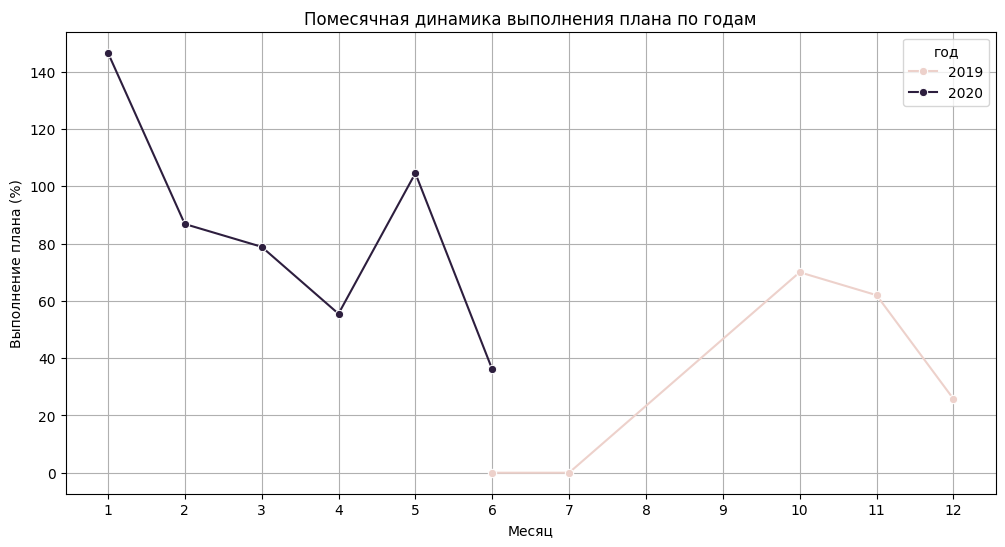

In [ ]:
# Создадим новый столбец для выполнения плана
data['выполнение плана (%)'] = (data['продажи факт, тыс.руб'] / data['продажи план, тыс.руб']) * 100

# Извлечем год и месяц из даты сделки
data['год'] = data['дата сделки'].dt.year
data['месяц'] = data['дата сделки'].dt.month

# Группируем по году и месяцу, а также по менеджеру
monthly_performance = (
    data.groupby(['год', 'месяц'])['выполнение плана (%)']
    .mean()
    .reset_index()
)

# Визуализация
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_performance, x='месяц', y='выполнение плана (%)', hue='год', marker='o')
plt.title('Помесячная динамика выполнения плана по годам')
plt.xlabel('Месяц')
plt.ylabel('Выполнение плана (%)')
plt.xticks(range(1, 13))  # Месяцы от 1 до 12
plt.grid()
plt.show()

Index(['Оборудование', 'Другое', 'Свет', 'Ткань и аксессуары', 'Одежда'], dtype='object', name='продуктовый сегмент')


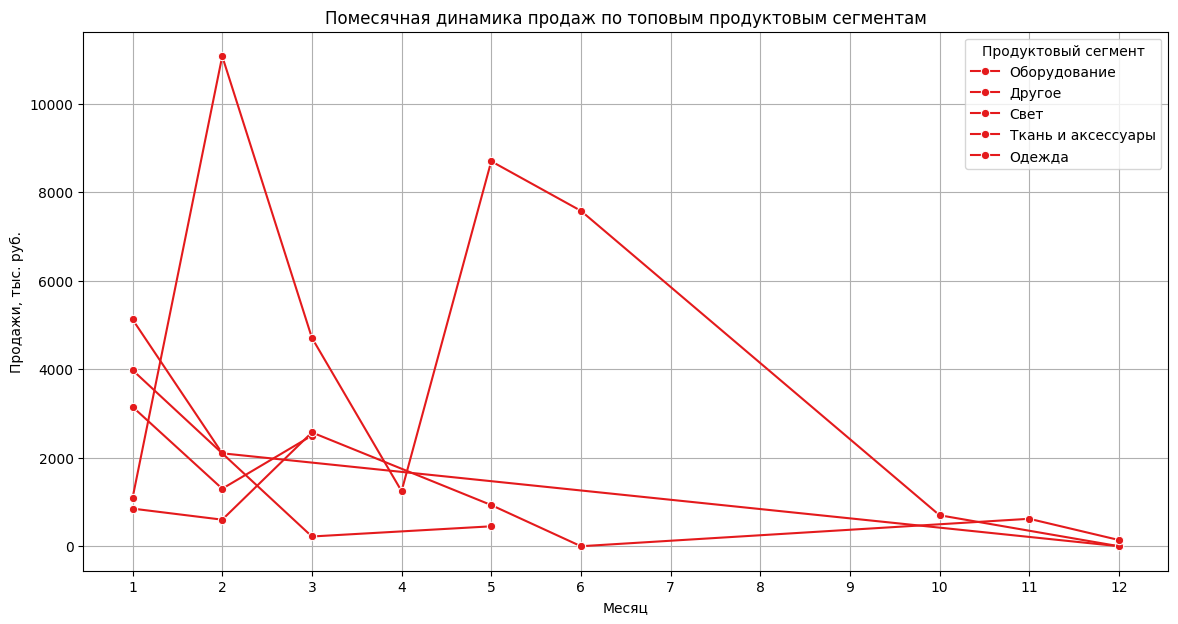

In [ ]:
# Группируем данные по продуктовым сегментам и по месяцу
sales_by_segment = (
    data.groupby(['продуктовый сегмент', 'год', 'месяц'])['продажи факт, тыс.руб']
    .sum()
    .reset_index()
)

# Определим сегменты с наибольшими суммарными продажами
top_segments = sales_by_segment.groupby(['продуктовый сегмент'])['продажи факт, тыс.руб'].sum().nlargest(5).index
print(top_segments)

# Визуализация по выбранным сегментам
plt.figure(figsize=(14, 7))

# Указываем палитру для разных сегментов
palette = sns.color_palette("viridis", n_colors=len(top_segments))

for segment in top_segments:
    segment_data = sales_by_segment[sales_by_segment['продуктовый сегмент'] == segment]
    sns.lineplot(data=segment_data, x='месяц', y='продажи факт, тыс.руб', hue='продуктовый сегмент', marker='o', palette='Set1')

plt.title('Помесячная динамика продаж по топовым продуктовым сегментам')
plt.xlabel('Месяц')
plt.ylabel('Продажи, тыс. руб.')
plt.xticks(range(1, 13))
plt.legend(title='Продуктовый сегмент')
plt.grid()
plt.show()


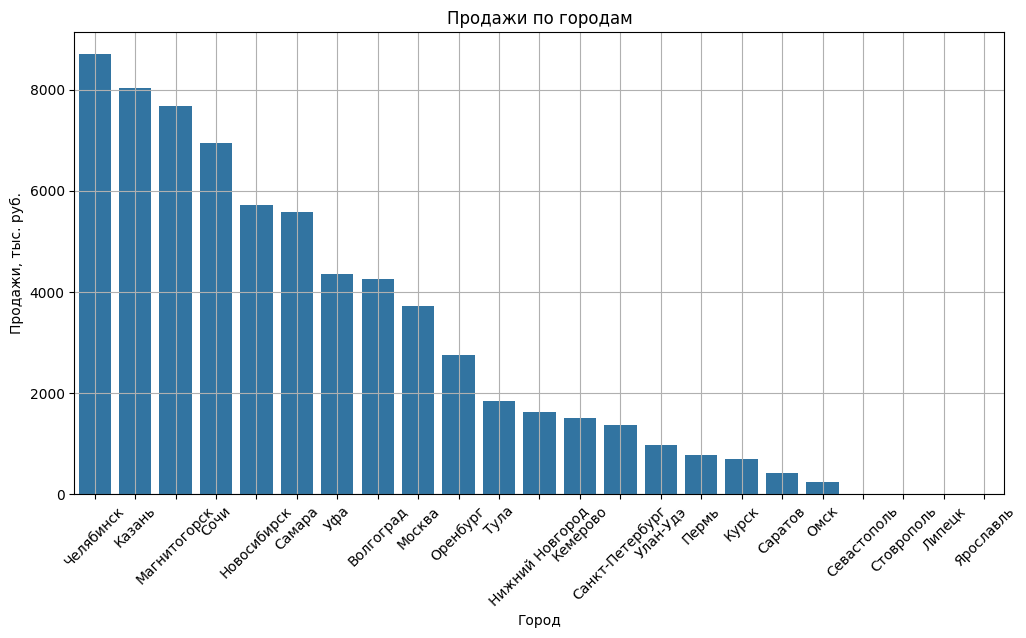

In [ ]:
# Суммируем продажи по городам
sales_by_city = data.groupby('город')['продажи факт, тыс.руб'].sum().reset_index().sort_values(by='продажи факт, тыс.руб', ascending=False)

# Визуализация
plt.figure(figsize=(12, 6))
sns.barplot(data=sales_by_city, x='город', y='продажи факт, тыс.руб')
plt.title('Продажи по городам')
plt.xlabel('Город')
plt.ylabel('Продажи, тыс. руб.')
plt.xticks(rotation=45)
plt.grid()
plt.show()


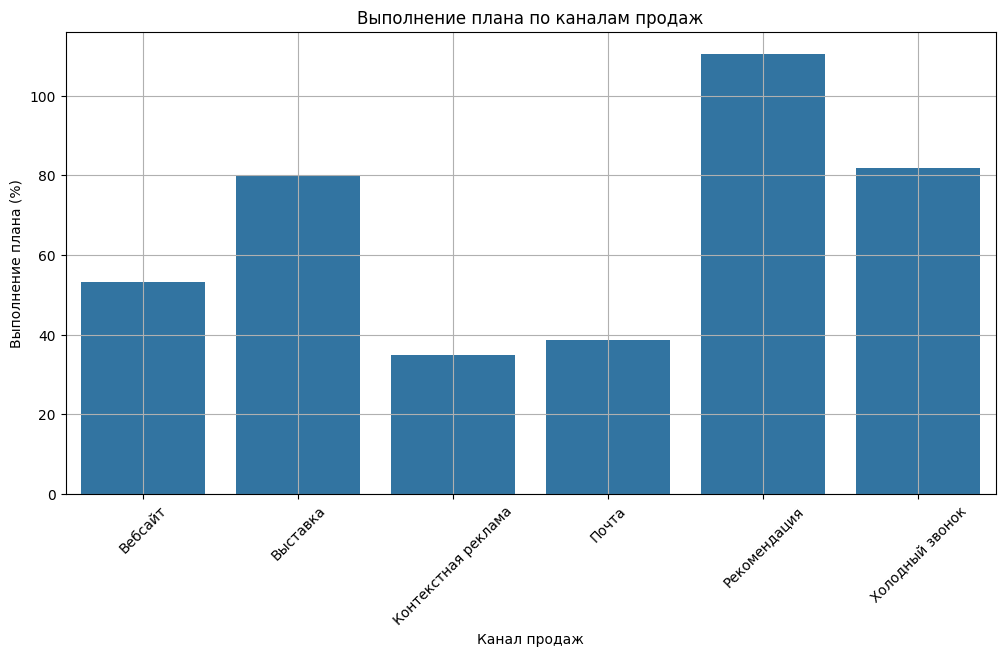

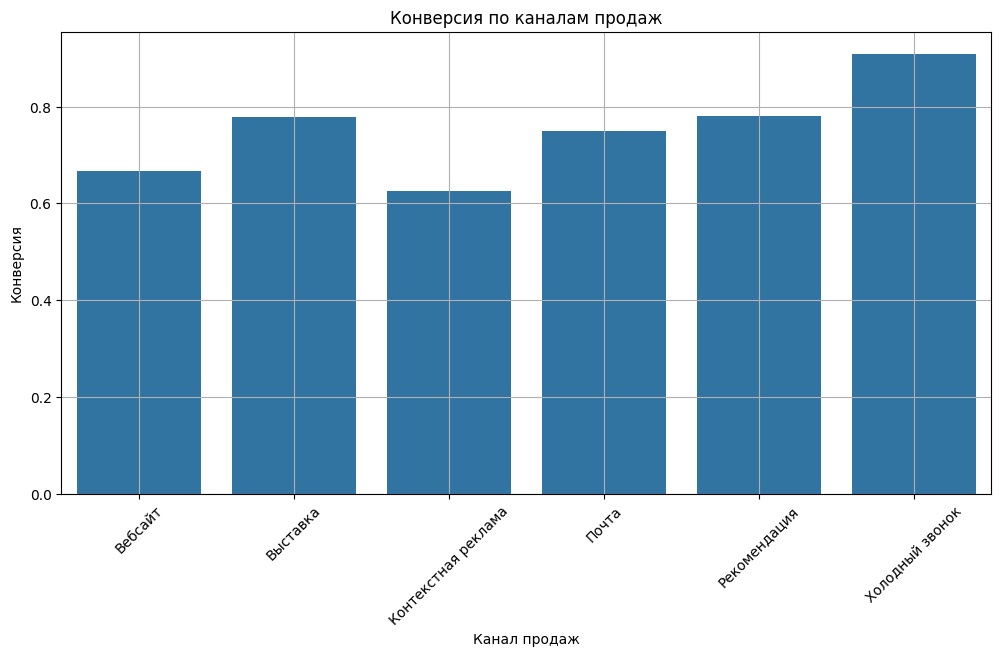

In [ ]:
# Создаем столбец для конверсии (кол-во успешно выполненных заказов к общему количеству)
data['конверсия'] = (data['продажи факт, тыс.руб'] > 0).astype(int)

# Группируем данные по каналу продаж
channel_performance = data.groupby('канал продаж').agg(
    выполнение_плана=('выполнение плана (%)', 'mean'),
    конверсия=('конверсия', 'mean'),
    средняя_длительность_сделки=('дней между сделкой и оплатой', 'mean')
).reset_index()

# Визуализация
plt.figure(figsize=(12, 6))
sns.barplot(data=channel_performance, x='канал продаж', y='выполнение_плана')
plt.title('Выполнение плана по каналам продаж')
plt.xlabel('Канал продаж')
plt.ylabel('Выполнение плана (%)')
plt.xticks(rotation=45)
plt.grid()
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=channel_performance, x='канал продаж', y='конверсия')
plt.title('Конверсия по каналам продаж')
plt.xlabel('Канал продаж')
plt.ylabel('Конверсия')
plt.xticks(rotation=45)
plt.grid()
plt.show()


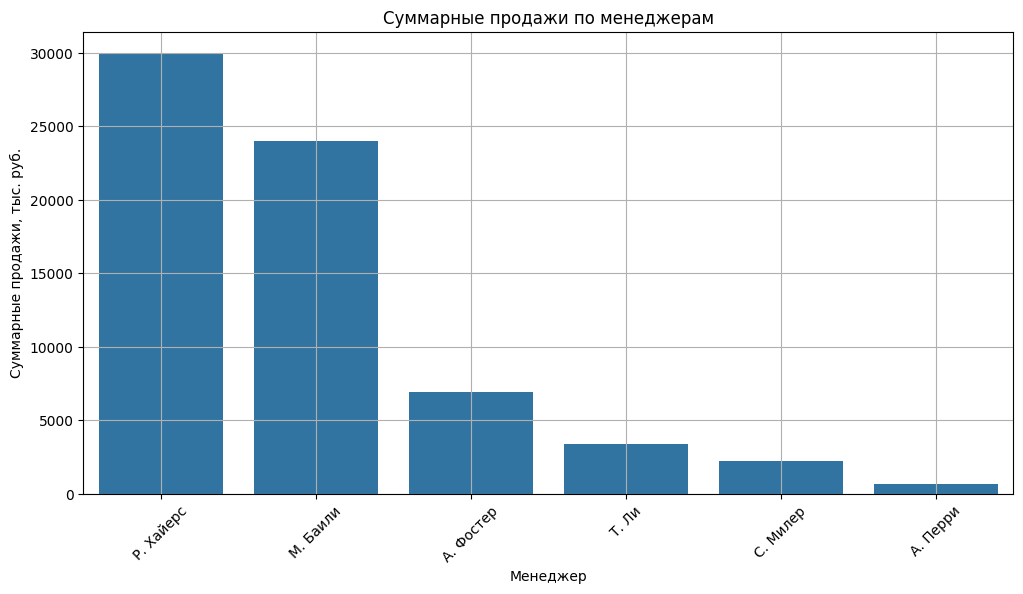

In [ ]:
manager_performance = data.groupby('менеджер').agg(
    выполнение_плана=('выполнение плана (%)', 'mean'),
    суммарные_продажи=('продажи факт, тыс.руб', 'sum'),
).reset_index().sort_values(by='суммарные_продажи', ascending=False)

# Визуализация
plt.figure(figsize=(12, 6))
sns.barplot(data=manager_performance, x='менеджер', y='суммарные_продажи')
plt.title('Суммарные продажи по менеджерам')
plt.xlabel('Менеджер')
plt.ylabel('Суммарные продажи, тыс. руб.')
plt.xticks(rotation=45)
plt.grid()
plt.show()



# Общий вывод
На основании исследовательского анализа сделайте вывод относительно того, что стоит ли
 - Профилировать ли менеджеров по товарным категориям или каналам продаж (где они лучше закрывают сделки, выполняют план)
 - Расширять самые доходные каналы продаж, регионы, где есть высокий спрос